In [14]:
import pandas as pd
import numpy as np
import scipy
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('friend_in.csv')
df.head()

,friend_in
0,76561197963876634
1,76561197963876634
2,76561197963876634
3,76561197963876634
4,76561197963876634


In [7]:
df2 = pd.read_csv('friends_list.csv', index_col=0)
df2.head()

,friend_out
0,76561197960869361
1,76561197960869554
2,76561197961886330
3,76561197963531856
4,76561197963593716


In [13]:
friend_networkx = pd.concat([df, df2], axis=1, sort=False)

In [15]:
tuples = [(x[0],x[1]) for x in friend_networkx.values]

friend_games = nx.Graph()
friend_games.add_edges_from(tuples)

In [16]:
tuples

[(76561197963876634, 76561197960869361),
 (76561197963876634, 76561197960869554),
 (76561197963876634, 76561197961886330),
 (76561197963876634, 76561197963531856),
 (76561197963876634, 76561197963593716),
 (76561197963876634, 76561197963596452),
 (76561197963876634, 76561197963600137),
 (76561197963876634, 76561197967434927),
 (76561197963876634, 76561197972100809),
 (76561197963876634, 76561197972760387),
 (76561197963876634, 76561197974251928),
 (76561197963876634, 76561197974553664),
 (76561197963876634, 76561197978431979),
 (76561197963876634, 76561197979975870),
 (76561197963876634, 76561197982933050),
 (76561197963876634, 76561197988703222),
 (76561197963876634, 76561197993298262),
 (76561197963876634, 76561197993699405),
 (76561197963876634, 76561197994926311),
 (76561197963876634, 76561197996410123),
 (76561197963876634, 76561198001016141),
 (76561197963876634, 76561198034070553),
 (76561197963876634, 76561198034220351),
 (76561197963876634, 76561198046557146),
 (76561197963876

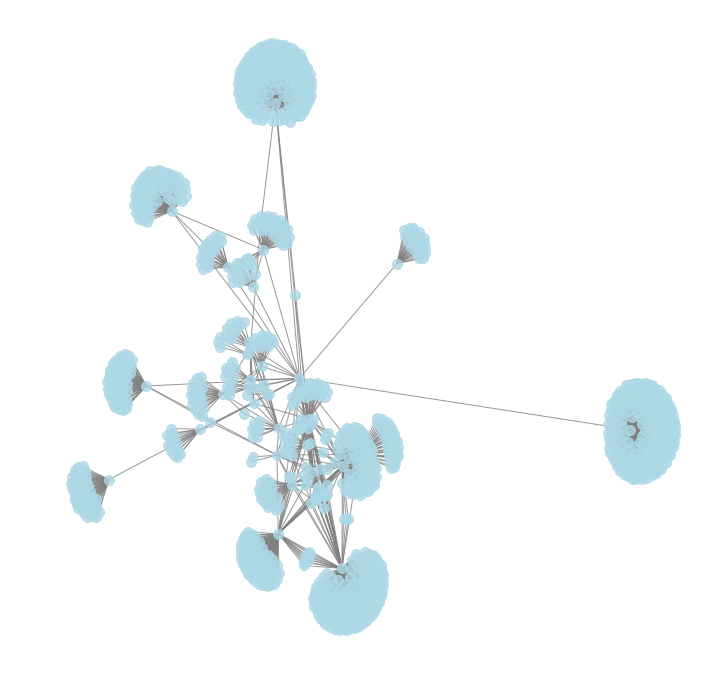

In [17]:
plt.rcParams['figure.figsize']=[12,12]
nx.draw_networkx(friend_games,
                pos=nx.spring_layout(friend_games),
                node_color='lightblue',
                edge_color='gray',
                node_size=100,
                with_labels=False,
                alpha=.8
                )

plt.axis('off')
plt.show()

In [18]:
numberofnodes=friend_games.number_of_nodes()
nodedegrees=dict(friend_games.degree())
nodedegrees=list(nodedegrees.values())
av_degree=np.mean(nodedegrees)
med_degree=np.median(nodedegrees)
clustering=list(nx.clustering(friend_games).values())
betweenness_cent=list(nx.betweenness_centrality(friend_games).values())
componentsizes=[len(c) for c in sorted(nx.connected_components(friend_games), key=len, reverse=True)]

This graph has 1271 nodes and 1450 edges.
The median degree is 1.0 and the mean degree is 2.2816679779701023.
There are 1 connected components within the graph.


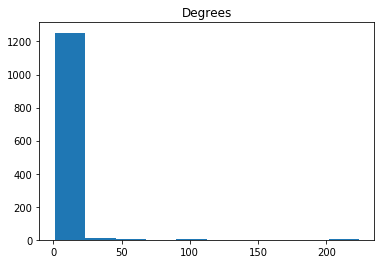

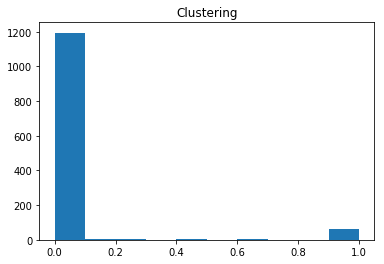

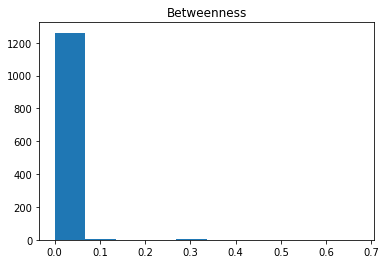

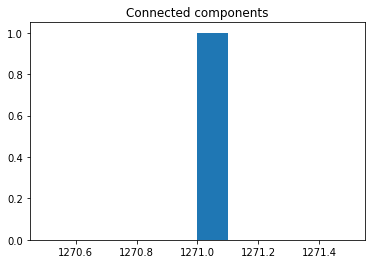

In [19]:
print('This graph has {} nodes and {} edges.'.format(friend_games.number_of_nodes(), friend_games.number_of_edges()))
print('The median degree is {} and the mean degree is {}.'.format(med_degree, av_degree))
print('There are {} connected components within the graph.'.format(nx.number_connected_components(friend_games)))

plt.rcParams['figure.figsize']=[6,4]

plt.hist(nodedegrees)
plt.title('Degrees')
plt.show()

plt.hist(clustering)
plt.title('Clustering')
plt.show()

plt.hist(betweenness_cent)
plt.title('Betweenness')
plt.show()

plt.hist(componentsizes)
plt.title('Connected components')
plt.show()